# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [45]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

pn.extension()

%matplotlib inline

In [46]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_API_KEY")
load_dotenv()

True

## Load Data

In [47]:
# Read the census data into a Pandas DataFrame
File_Path = Path("Data/sfo_neighborhoods_census_data.csv")
SFO_Data = pd.read_csv(File_Path, index_col="year")

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [48]:
# Calculate the mean number of housing units per year (hint: use groupby) 
Mean_Housing_Units = SFO_Data.groupby(["year"])["housing_units"].mean()

Text(0, 0.5, 'Housing Units')

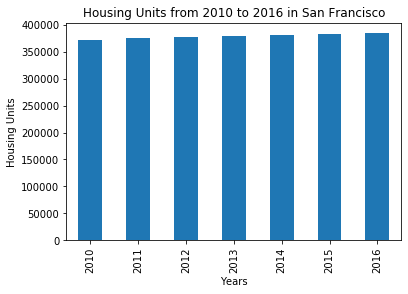

In [49]:
Mean_Housing_Units.plot.bar(title="Housing Units from 2010 to 2016 in San Francisco")
plt.xlabel("Years")
plt.ylabel("Housing Units")

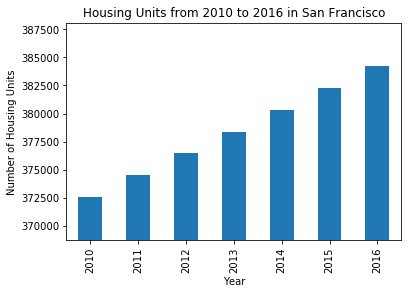

In [50]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
SFO_Grouped_MIN = SFO_Data.groupby(["year"])["housing_units"].min().min()
SFO_Grouped_MAX = SFO_Data.groupby(["year"])["housing_units"].max().max()
SFO_Grouped_STD = SFO_Data["housing_units"].std()

First_Year = Mean_Housing_Units.index[0]
Last_Year = Mean_Housing_Units.index[-1]

Fig_Housing_Units = Mean_Housing_Units.plot.bar(xlim=[First_Year, Last_Year],
                                               ylim=[SFO_Grouped_MIN - SFO_Grouped_STD, SFO_Grouped_MAX + SFO_Grouped_STD])
Fig_Housing_Units.set_title("Housing Units from 2010 to 2016 in San Francisco")
Fig_Housing_Units.set_xlabel("Year")
Fig_Housing_Units.set_ylabel("Number of Housing Units")

plt.show()

#plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

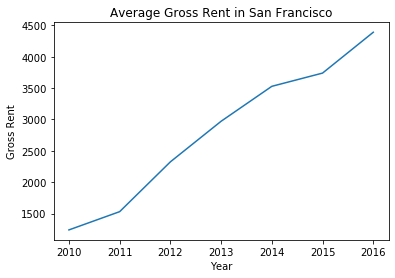

In [51]:
# Calculate the average gross rent and average sale price per square foot
Mean_Gross_Rent = SFO_Data.groupby(["year"])["gross_rent"].mean()
Mean_Sale_Price_SQRF = SFO_Data.groupby(["year"])["sale_price_sqr_foot"].mean()

Fig_Gross_Rent = Mean_Gross_Rent.plot.line()
Fig_Gross_Rent.set_title("Average Gross Rent in San Francisco")
Fig_Gross_Rent.set_xlabel("Year")
Fig_Gross_Rent.set_ylabel("Gross Rent")
plt.show()

### Average Sales Price per Year

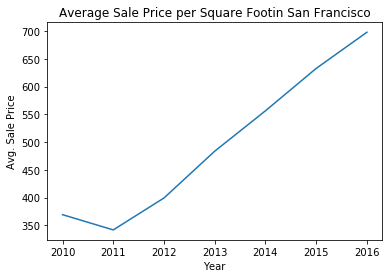

In [52]:
# Plot the Average Sales Price per Year as a line chart
Fig_Sale_Price_Per_SQRF = Mean_Sale_Price_SQRF.plot.line()

Fig_Sale_Price_Per_SQRF.set_title("Average Sale Price per Square Footin San Francisco")
Fig_Sale_Price_Per_SQRF.set_xlabel("Year")
Fig_Sale_Price_Per_SQRF.set_ylabel("Avg. Sale Price")
plt.show()

In [53]:
# Compose plots using + operator
Mean_Housing_Units.hvplot.bar() + Mean_Gross_Rent.hvplot.line() + Mean_Sale_Price_SQRF.hvplot.line()

:Layout
   .Bars.Housing_units        :Bars   [year]   (housing_units)
   .Curve.Gross_rent          :Curve   [year]   (gross_rent)
   .Curve.Sale_price_sqr_foot :Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [54]:
# Group by year and neighborhood and then create a new dataframe of the mean values
SFO_Neighborhood = pd.read_csv("Data/sfo_neighborhoods_census_data.csv")
SFO_Grouped_Year_and_NBHD = SFO_Neighborhood.groupby(["year", "neighborhood"])
SFO_Grouped_Year_and_NBHD.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [55]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
AVG_Price_Mean = SFO_Grouped_Year_and_NBHD.mean()
SFO_Grouped_Year_and_NBHD = AVG_Price_Mean.hvplot.line(
    x='year',
    y='sale_price_sqr_foot',
    xlabel='Year',
    ylabel='Price per Sqr Foot',
    groupby='neighborhood',
    width=600
).opts(yformatter='%0f')

SFO_Grouped_Year_and_NBHD

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [65]:
# Getting the data from the top 10 expensive neighborhoods
Group_Neighborhood = SFO_Data.groupby(["neighborhood"]).mean()
TOP_10_Expensive = Group_Neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
TOP_10_Expensive = TOP_10_Expensive.reset_index()
TOP_10_Expensive

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [66]:
# Plotting the data from the top 10 expensive neighborhoods
TOP_10_Expensive.hvplot.bar(
    x="neighborhood", 
    y="sale_price_sqr_foot", 
    xlabel = "Neighborhoods",
    ylabel = "Average Sale Price Per Square Foot",
    title="Top 10 Most Expensive Neighborhoods in SFO", 
    height=400,
    rot=90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

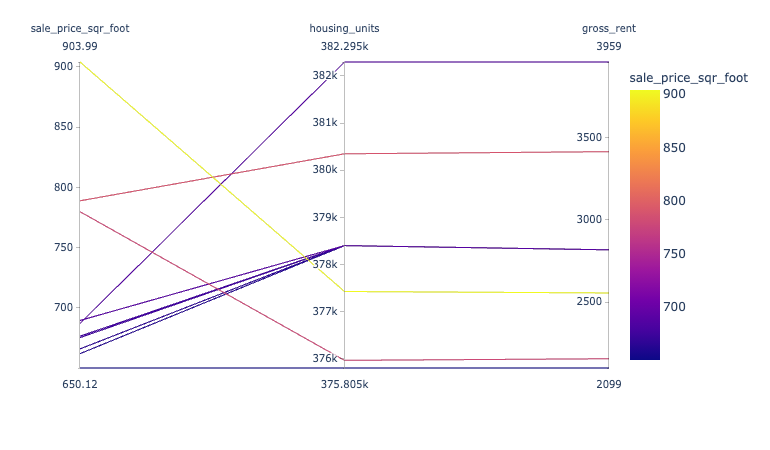

In [67]:
# Parallel Coordinates Plot
px.parallel_coordinates(TOP_10_Expensive, color='sale_price_sqr_foot')

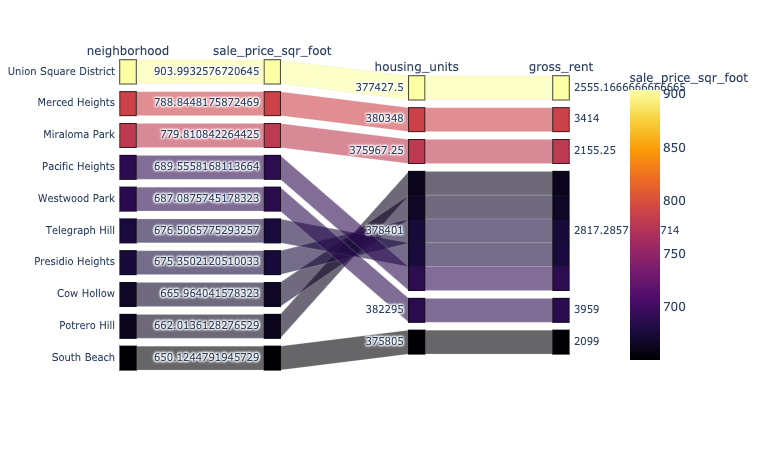

In [68]:
# Parallel Categories Plot
px.parallel_categories(
    TOP_10_Expensive,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [70]:
# Load neighborhoods coordinates data
File_Path = Path("Data/neighborhoods_coordinates.csv")
DF_Locations = pd.read_csv(File_Path)
DF_Locations.columns = ["Neighborhood", "Lat", "Lon"]

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [73]:
# Calculate the mean values for each neighborhood
Mean_Data = SFO_Data.groupby(["neighborhood"]).mean()
Mean_Data.reset_index(inplace=True)

In [75]:
# Join the average values with the neighborhood locations
Combined_Data = pd.concat([DF_Locations, Mean_Data], axis='columns', join='inner')
Combined_Data = Combined_Data.iloc[:, 1:]

### Mapbox Visualization

# Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

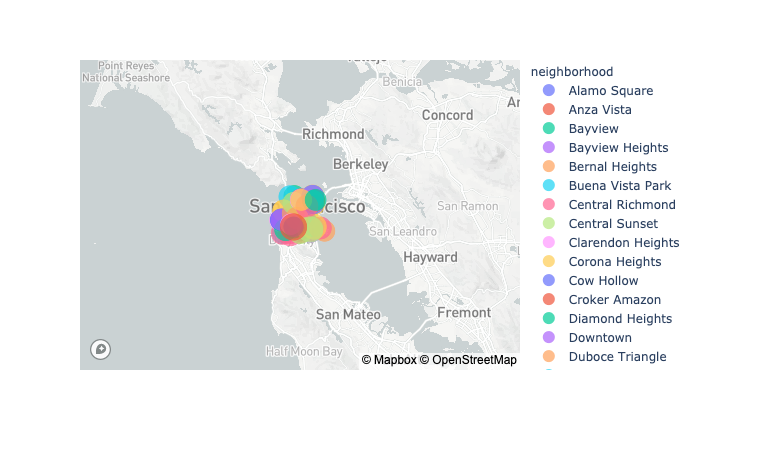

In [76]:
px.set_mapbox_access_token(mapbox_token)
map = px.scatter_mapbox(
    Combined_Data,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="neighborhood"
)
map.show()